In [ ]:
import import_ipynb
%run 03-EDA.ipynb


### Imports

In [2]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import make_scorer
from sklearn.ensemble import GradientBoostingClassifier



import statsmodels.api as sm

<a id="7"></a>
# <div style="padding:20px;color:white;margin:0;color:darkgreen;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#f2ffe6;overflow:hidden">7. | Model Development: CDC Data: Gradient Boosting Classifier</div>

### Selected Features

In [3]:
selected_features_cdc_data = ['HighBP', 'HighChol', 'BMI', 'PhysActivity', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',  'Age', 'Education' ,'Income']

<a id="7.1"></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#E0FFFF;overflow:hidden">7.1 | Model Development: CDC Data: Gradient Boosting Classifier: First Iteration</div>

### Split Features and Target

In [4]:
X = cdc_data[selected_features_cdc_data]
y = cdc_data['Diabetes_binary']

### Split Train and Test Dataset

In [5]:
X_train,X_test,y_train,y_test=  train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(202944, 11) (202944,)
(50736, 11) (50736,)


#### Train with  Gradient Boosting Classifier

In [7]:
model_gbc = GradientBoostingClassifier()
model_gbc.fit(X_train, y_train)

GradientBoostingClassifier()

### Predict Using Gradient Boosting Classifier

In [8]:

predictions_train_gbc = model_gbc.predict(X_train)
predictions_test_gbc  = model_gbc.predict(X_test)

### Gradient Boosting Classifier: Significant Variables

         Feature  Importance
0         HighBP    0.297516
4        GenHlth    0.287350
2            BMI    0.177654
8            Age    0.084203
1       HighChol    0.080134
7       DiffWalk    0.051969
10        Income    0.013061
9      Education    0.002798
5       MentHlth    0.002712
6       PhysHlth    0.002233
3   PhysActivity    0.000370


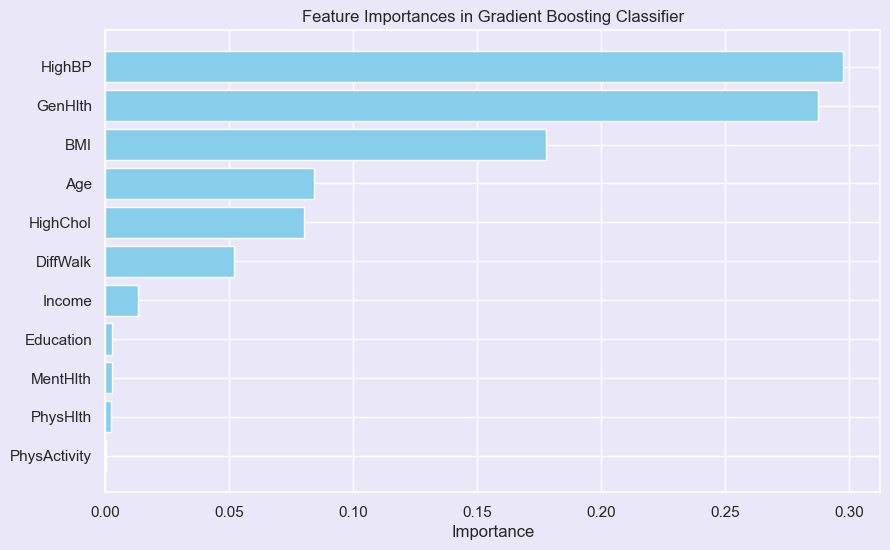

In [9]:
# Extract feature importances
feature_importances = model_gbc.feature_importances_

# Get feature names (assuming X is a DataFrame)
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances in Gradient Boosting Classifier')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.show()

### GBC: Feature Importance and Interpretation

Key Influencers: 

HighBP, GenHlth, and BMI are the top three significant features, suggesting that these health indicators are the most critical factors for the model's decision-making process.

Moderate Factors: 

Age and HighChol provide additional predictive power but are not as influential as the top features.

Less Influential Features: 
Income, Education, MentHlth, PhysHlth, and PhysActivity have minimal impact, 

indicating that they are not key drivers in the model's predictions for this dataset.
 
Implications:
 
Feature Selection: 

Focus on HighBP, GenHlth, and BMI for further analysis, feature engineering, or interventions, as they hold the most predictive power.

Model Insights: 

The feature importances offer insights into the underlying patterns in the data, guiding decisions in healthcare or related fields.

Potential Actions: Consider whether less important features should be included, removed,

or further examined for interactions or transformations to improve model performance.

#### Plot Confusion Matrix For Gradient Boosting Classifier

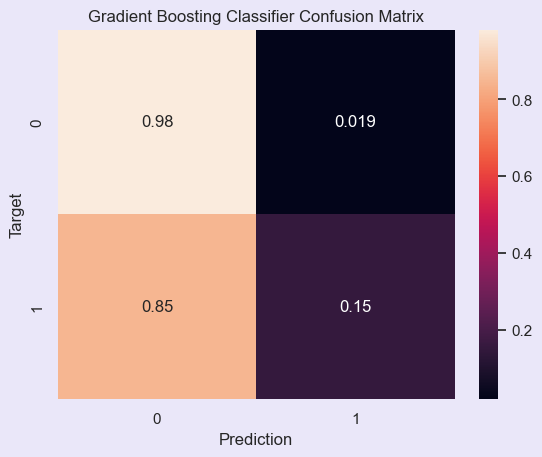

In [10]:
cf_gbc = confusion_matrix(y_train, predictions_train_gbc, normalize='true')
plt.figure()
sns.heatmap(cf_gbc, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('{} Confusion Matrix'.format("Gradient Boosting Classifier"))
plt.show()

#### Calculate Evaluation Metrics for Gradient Boosting Classifier

In [11]:
# Training set performance
gbc_train_accuracy = accuracy_score(y_train, predictions_train_gbc) # Calculate Accuracy
gbc_train_f1 = f1_score(y_train, predictions_train_gbc) # Calculate F1-score
gbc_train_precision = precision_score(y_train, predictions_train_gbc) # Calculate Precision
gbc_train_recall = recall_score(y_train, predictions_train_gbc) # Calculate Recall
gbc_train_rocauc_score = roc_auc_score(y_train, predictions_train_gbc)
gbc_train_log_loss_value = log_loss(y_train, predictions_train_gbc)


# Test set performance
gbc_test_accuracy = accuracy_score(y_test, predictions_test_gbc) # Calculate Accuracy
gbc_test_f1 = f1_score(y_test, predictions_test_gbc) # Calculate F1-score
gbc_test_precision = precision_score(y_test, predictions_test_gbc) # Calculate Precision
gbc_test_recall = recall_score(y_test, predictions_test_gbc) # Calculate Recall
gbc_test_rocauc_score = roc_auc_score(y_test, predictions_test_gbc) #Calculate Roc
gbc_test_log_loss_value = log_loss(y_test, predictions_test_gbc)

print('GBC: Model performance for Training set')
print("- Accuracy: {:.4f}".format(gbc_train_accuracy))
print('- F1 score: {:.4f}'.format(gbc_train_f1))
print('- Precision: {:.4f}'.format(gbc_train_precision))
print('- Recall: {:.4f}'.format(gbc_train_recall))
print('- Roc Auc Score: {:.4f}'.format(gbc_train_rocauc_score))
print('- Log Loss: {:.4f}'.format(gbc_train_log_loss_value))

    
    
print('----------------------------------')
    
print('GBC: Model performance for Test set')
print('- Accuracy: {:.4f}'.format(gbc_test_accuracy))
print('- F1 score: {:.4f}'.format(gbc_test_f1))
print('- Precision: {:.4f}'.format(gbc_test_precision))
print('- Recall: {:.4f}'.format(gbc_test_recall))
print('- Roc Auc Score: {:.4f}'.format(gbc_test_rocauc_score))
print('- Log Loss: {:.4f}'.format(gbc_test_log_loss_value))

    
print('='*35)
print('\n')

GBC: Model performance for Training set
- Accuracy: 0.8658
- F1 score: 0.2425
- Precision: 0.5732
- Recall: 0.1538
- Roc Auc Score: 0.5676
- Log Loss: 4.8370
----------------------------------
GBC: Model performance for Test set
- Accuracy: 0.8670
- F1 score: 0.2483
- Precision: 0.5635
- Recall: 0.1592
- Roc Auc Score: 0.5697
- Log Loss: 4.7925




#### GBC: Classification Report


In [12]:
cm_gbc_train = classification_report(y_train,predictions_train_gbc)

print('Gradient Boosting Model: Train\n')
print(cm_gbc_train)

cm_gbc_test = classification_report(y_test,predictions_test_gbc)

print('Gradient Boosting Model: Test\n')
print(cm_gbc_test)

Gradient Boosting Model: Train

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93    174595
         1.0       0.57      0.15      0.24     28349

    accuracy                           0.87    202944
   macro avg       0.73      0.57      0.58    202944
weighted avg       0.83      0.87      0.83    202944

Gradient Boosting Model: Test

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.56      0.16      0.25      6997

    accuracy                           0.87     50736
   macro avg       0.72      0.57      0.59     50736
weighted avg       0.84      0.87      0.83     50736



#### GBC: N-fold cross-validation

In [13]:
n_splits = 5

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

X = cdc_data[selected_features_cdc_data]
y = cdc_data['Diabetes_binary']

model_gbc = GradientBoostingClassifier()

# Arrays to store accuracy scores
training_accuracies = []
testing_accuracies = []

# Arrays to store f1 scores
training_f1 = []
testing_f1 = []

# Arrays to store Precision scores
training_precision = []
testing_precision = []

# Arrays to store Recall scores
training_recall = []
testing_recall = []

# Arrays to store RO-AUC scores
training_rocauc_score = []
testing_rocauc_score = []

# Arrays to store Log Loss scores
training_log_loss_value = []
testing_log_loss_value = []

# Perform cross-validation
for train_index, test_index in skf.split(X, y):
    # Split the data into training and test sets for this fold
    X_train_kfold, X_test_kfold = X.iloc[train_index], X.iloc[test_index]
    y_train_kfold, y_test_kfold = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    model_gbc.fit(X_train_kfold, y_train_kfold)
    
    # Predict on training and test data
    pred_train_gbc_kfold = model_gbc.predict(X_train_kfold)
    pred_test_gbc_kfold = model_gbc.predict(X_test_kfold)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train_kfold, pred_train_gbc_kfold)
    test_accuracy = accuracy_score(y_test_kfold, pred_test_gbc_kfold)
    
    # Store the accuracy scores
    training_accuracies.append(train_accuracy)
    testing_accuracies.append(test_accuracy)

    # Calculate f1
    train_f1 = f1_score(y_train_kfold, pred_train_gbc_kfold)
    test_f1 = f1_score(y_test_kfold, pred_test_gbc_kfold)
    
    # Store the f1 scores
    training_f1.append(train_f1)
    testing_f1.append(test_f1)

    # Calculate Precision
    train_precision_score = precision_score(y_train_kfold, pred_train_gbc_kfold)
    test_precision_score = precision_score(y_test_kfold, pred_test_gbc_kfold)
    
    # Store the Precision scores
    training_precision.append(train_precision_score)
    testing_precision.append(test_precision_score)

    # Calculate recall
    train_recall_score = recall_score(y_train_kfold, pred_train_gbc_kfold)
    test_recall_score = recall_score(y_test_kfold, pred_test_gbc_kfold)
    
    # Store the recall scores
    training_recall.append(train_recall_score)
    testing_recall.append(test_recall_score)

    # Calculate RO-AUC
    train_roc_auc_score = roc_auc_score(y_train_kfold, pred_train_gbc_kfold)
    test_roc_auc_score = roc_auc_score(y_test_kfold, pred_test_gbc_kfold)
    
    # Store the RO-AUC scores
    training_rocauc_score.append(train_roc_auc_score)
    testing_rocauc_score.append(test_roc_auc_score)

    # Calculate Log Loss
    train_log_loss = log_loss(y_train_kfold, pred_train_gbc_kfold)
    test_log_loss = log_loss(y_test_kfold, pred_test_gbc_kfold)
    
    # Store the Log Loss
    training_log_loss_value.append(train_log_loss)
    testing_log_loss_value.append(test_log_loss)


# Calculate mean and standard deviation of accuracies
mean_train_accuracy = np.mean(training_accuracies)
std_train_accuracy = np.std(training_accuracies)
mean_test_accuracy = np.mean(testing_accuracies)
std_test_accuracy = np.std(testing_accuracies)

# Print results
print("\n")
print("="*50)
print(f"Training Accuracy: {mean_train_accuracy:.2f} ± {std_train_accuracy:.2f}")
print(f"Test Accuracy: {mean_test_accuracy:.2f} ± {std_test_accuracy:.2f}")
print("="*50)

# Calculate mean and standard deviation of f1 scores

mean_train_f1 = np.mean(training_f1)
std_train_f1 = np.std(training_f1)
mean_test_f1 = np.mean(testing_f1)
std_test_f1 = np.std(testing_f1)

# Print results
print("\n")
print("="*50)
print(f"Training F1: {mean_train_f1:.2f} ± {std_train_f1:.2f}")
print(f"Test F1: {mean_test_f1:.2f} ± {std_test_f1:.2f}")
print("="*50)

# Calculate mean and standard deviation of Precision scores

mean_train_precision = np.mean(training_precision)
std_train_precision = np.std(training_precision)
mean_test_precision = np.mean(testing_precision)
std_test_precision = np.std(testing_precision)

# Print results
print("\n")
print("="*50)
print(f"Training Precision: {mean_train_precision:.2f} ± {std_train_precision:.2f}")
print(f"Test Precision: {mean_test_precision:.2f} ± {std_test_precision:.2f}")
print("="*50)

# Calculate mean and standard deviation of Recall scores

mean_train_recall = np.mean(training_recall)
std_train_recall = np.std(training_recall)
mean_test_recall = np.mean(testing_recall)
std_test_recall = np.std(testing_recall)

# Print results
print("\n")
print("="*50)
print(f"Training Recall: {mean_train_recall:.2f} ± {std_train_recall:.2f}")
print(f"Test Recall: {mean_test_recall:.2f} ± {std_test_recall:.2f}")
print("="*50)

# Calculate mean and standard deviation of RO-AUC scores

mean_train_rocauc_score = np.mean(training_rocauc_score)
std_train_rocauc_score = np.std(training_rocauc_score)
mean_test_rocauc_score = np.mean(testing_rocauc_score)
std_test_rocauc_score = np.std(testing_rocauc_score)

# Print results
print("\n")
print("="*50)
print(f"Training RO-AUC: {mean_train_rocauc_score:.2f} ± {std_train_rocauc_score:.2f}")
print(f"Test RO-AUC: {mean_test_rocauc_score:.2f} ± {std_test_rocauc_score:.2f}")
print("="*50)

# Calculate mean and standard deviation of Log Loss scores

mean_train_log_loss_value = np.mean(training_log_loss_value)
std_train_log_loss_value = np.std(training_log_loss_value)
mean_test_log_loss_value = np.mean(testing_log_loss_value)
std_test_log_loss_value = np.std(testing_log_loss_value)

# Print results
print("\n")
print("="*50)
print(f"Training Log Loss: {mean_train_log_loss_value:.2f} ± {std_train_log_loss_value:.2f}")
print(f"Test Log Loss: {mean_test_log_loss_value:.2f} ± {std_test_log_loss_value:.2f}")
print("="*50)





Training Accuracy: 0.87 ± 0.00
Test Accuracy: 0.87 ± 0.00


Training F1: 0.24 ± 0.00
Test F1: 0.24 ± 0.01


Training Precision: 0.57 ± 0.00
Test Precision: 0.57 ± 0.01


Training Recall: 0.15 ± 0.00
Test Recall: 0.15 ± 0.00


Training RO-AUC: 0.57 ± 0.00
Test RO-AUC: 0.57 ± 0.00


Training Log Loss: 4.82 ± 0.00
Test Log Loss: 4.84 ± 0.02


<a id="7.1"></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#E0FFFF;overflow:hidden">7.1 | Model Development: CDC Data: Gradient Boosting Classifier: First Iteration: Conclusions</div>

<div style="background-color:white;font-size:15px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"> <b>Evaluate: Logistic Regression Model</b><br>

Training Accuracy: 0.87 ± 0.00 : Test Accuracy: 0.87 ± 0.00 : Training F1: 0.24 ± 0.00: Test F1: 0.24 ± 0.01

Training Precision: 0.57 ± 0.00 : Test Precision: 0.57 ± 0.01

Training Recall: 0.15 ± 0.00 : Test Recall: 0.15 ± 0.00

Training RO-AUC: 0.57 ± 0.00 : Test RO-AUC: 0.57 ± 0.00

Training Log Loss: 4.82 ± 0.00 : Test Log Loss: 4.84 ± 0.02


</div>

<div style="background-color:white;font-size:15px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden">

<b>Overall Conclusions:</b>
  
Class Imbalance: 

The disparity between high accuracy and low F1 score, recall, and ROC AUC suggests that the dataset may be imbalanced. 

The model might be biased towards predicting the majority class.


Model Calibration and Discrimination:

 The high log loss and low ROC AUC indicate that the model's probability estimates are not well-calibrated and 
 
 it struggles to discriminate between classes.


Need for Improvement: 

To improve performance, focus on increasing recall and F1 score by:


Addressing class imbalance through techniques like resampling, synthetic data generation (e.g., SMOTE), or adjusting class weights.


Exploring different algorithms or hyperparameter tuning to better capture the minority class.


Evaluating additional metrics such as the confusion matrix to understand where the model is making errors.

</div>



<a id="7"></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#F88379;overflow:hidden">7 | Model Development: CDC Data: Gradient Boost Classifier: Not Suitable </div>


Given the significant challenges highlighted by the performance metrics, such as poor recall, F1 score, and calibration, 

it may be beneficial to explore alternative models or 

techniques that are better suited to addressing the specific issues faced by the current GBC model.